In [1]:
# use spam.csv dataset from sms-spam-collection-dataset.zip


In [2]:
# 1. Create a word cloud to analyse the ham data

In [3]:
# 2. create a custom bag of words

In [4]:
# 3. remove stop words from the bag of words

In [5]:
# 3. using numpy create count vectors for the text data using bag of words

In [6]:
# 4. fit the naive bayes model with above vectors and compare the accuracy with existing model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spam = pd.read_csv('C:/Users/SHUBHAM.PARAB/Desktop/DigitalVidya/Datasets/spam.csv', encoding='ISO-8859-1', engine='c')
spam.head()

spam_df = spam[['v1', 'v2']]
spam_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
spam_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


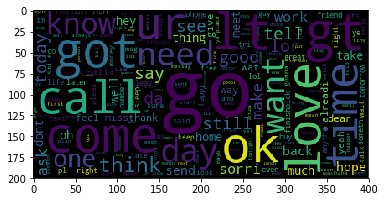

In [8]:
from wordcloud import WordCloud
wc = WordCloud()

spam_list = spam_df[spam_df['target'] == 'ham']['text'].unique().tolist()
spam_list = " ".join(spam_list)

spam_wc = wc.generate(spam_list)

plt.figure()
plt.imshow(spam_wc)
plt.show()

In [3]:
spam_df['text'] = spam_df['text'].str.lower().str.replace('[^a-z]', ' ').str.split() 

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()
spam_df['text'] = spam_df['text'].apply(lambda x : ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))
spam_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHUBHAM.PARAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,target,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


# Naive Bayes

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(spam_df.text)
X = cv.transform(spam_df.text).toarray()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(spam_df.target)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)



from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9791816223977028

# Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
pred_dtree = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc_dtree = accuracy_score(y_test, pred_dtree)
acc_dtree

0.9784637473079684

# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)
pred_rf = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(y_test, pred_rf)
acc_rf

0.968413496051687

# SVM

In [7]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
pred_svm = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc_svm = accuracy_score(y_test, pred_svm)
acc_svm

0.8585786073223259